# Finance & Analytics Club

## RSI (Relative Strength Index)

It is a momentum oscillator which measures the speed and change of price movements.

RSI values oscillates between 0 to 100 with values above 70 indicating that the asset has now reached overbought territory. Values below 30 signify oversold territory.

Assets can remain in oversold and overbought territory for a long period of time. 

More at: https://www.investopedia.com/terms/r/rsi.asp

Import necessary libraries

In [1]:
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Download historical data for required stocks

In [2]:
ticker = "AAPL"
ohlcv = pdr.get_data_yahoo(ticker,dt.date.today()-dt.timedelta(364),dt.date.today())
ohlcv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-27,201.570007,199.570007,200.289993,199.740005,20899700.0,197.384323
2019-06-28,199.500000,197.050003,198.679993,197.919998,31110600.0,195.585770
2019-07-01,204.490005,200.649994,203.169998,201.550003,27316700.0,199.172989
2019-07-02,203.130005,201.360001,201.410004,202.729996,16935200.0,200.339050
2019-07-03,204.440002,202.690002,203.279999,204.410004,11362000.0,201.999237
...,...,...,...,...,...,...
2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001
2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995
2020-06-23,372.380005,362.269989,364.000000,366.529999,53038900.0,366.529999


### Function to calculate RSI

#### I would strongly urge you to go through any youtube video on RSI calculation through excel to get a clear indication about what we are about to do on the following code.

In [3]:
def RSI(DF,n):
    df = DF.copy()
    df['delta']=df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0) # np.where is the if else staement for numpy, also check documentaion page
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0) # note we are taking absolute value of loss
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    return df

In [4]:
df = RSI(ohlcv,14)
df = df.dropna()
df

,High,Low,Open,Close,Volume,Adj Close,delta,gain,loss,avg_gain,avg_loss,RS,RSI
Date,,,,,,,,,,,,,
2019-07-18,205.880005,203.699997,204.000000,205.660004,18582200.0,203.234497,2.282761,2.282761,0.000000,1.091969,0.674100,1.619893,61.830502
2019-07-19,206.500000,202.360001,205.789993,202.589996,20929300.0,200.200699,-3.033798,0.000000,3.033798,1.013971,0.842649,1.203313,54.613809
2019-07-22,207.229996,203.610001,203.649994,207.220001,22277900.0,204.776108,4.575409,4.575409,0.000000,1.268360,0.782460,1.620989,61.846470
2019-07-23,208.910004,207.289993,208.460007,208.839996,18355200.0,206.376984,1.600876,1.600876,0.000000,1.292111,0.726570,1.778370,64.007678
2019-07-24,209.149994,207.169998,207.669998,208.669998,14991600.0,206.209015,-0.167969,0.000000,0.167969,1.199817,0.686670,1.747298,63.600599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001,-2.010010,0.000000,2.010010,3.053847,1.476545,2.068238,67.408009
2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995,9.149994,9.149994,0.000000,3.489286,1.371077,2.544923,71.790640
2020-06-23,372.380005,362.269989,364.000000,366.529999,53038900.0,366.529999,7.660004,7.660004,0.000000,3.787194,1.273143,2.974680,74.840744


### Plottting RSI

/Users/subhamgupta/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


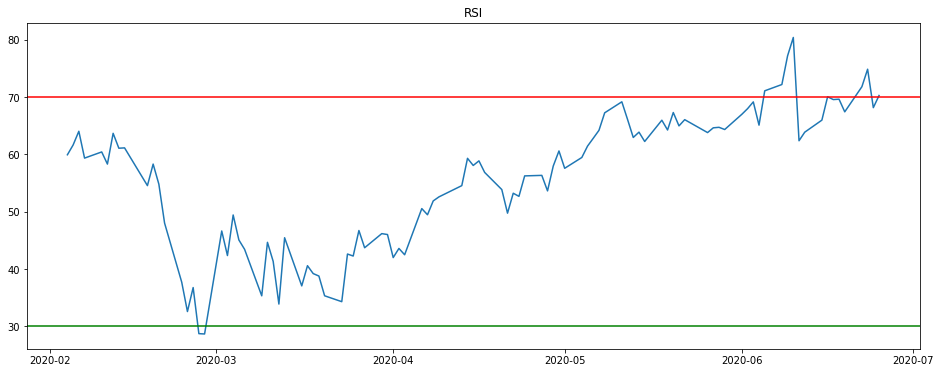

In [5]:
plt.figure(figsize = (16,6))
plt.plot(df.iloc[-100:,-1])
plt.title('RSI')
plt.axhline(y=70, color = 'red')
plt.axhline(y=30, color = 'green')
plt.show()

#### Points below red line indicates that stocks are overbought while points below green line indicates that the stocks are oversold.